In [ ]:
# Understading Update weights based on Formula

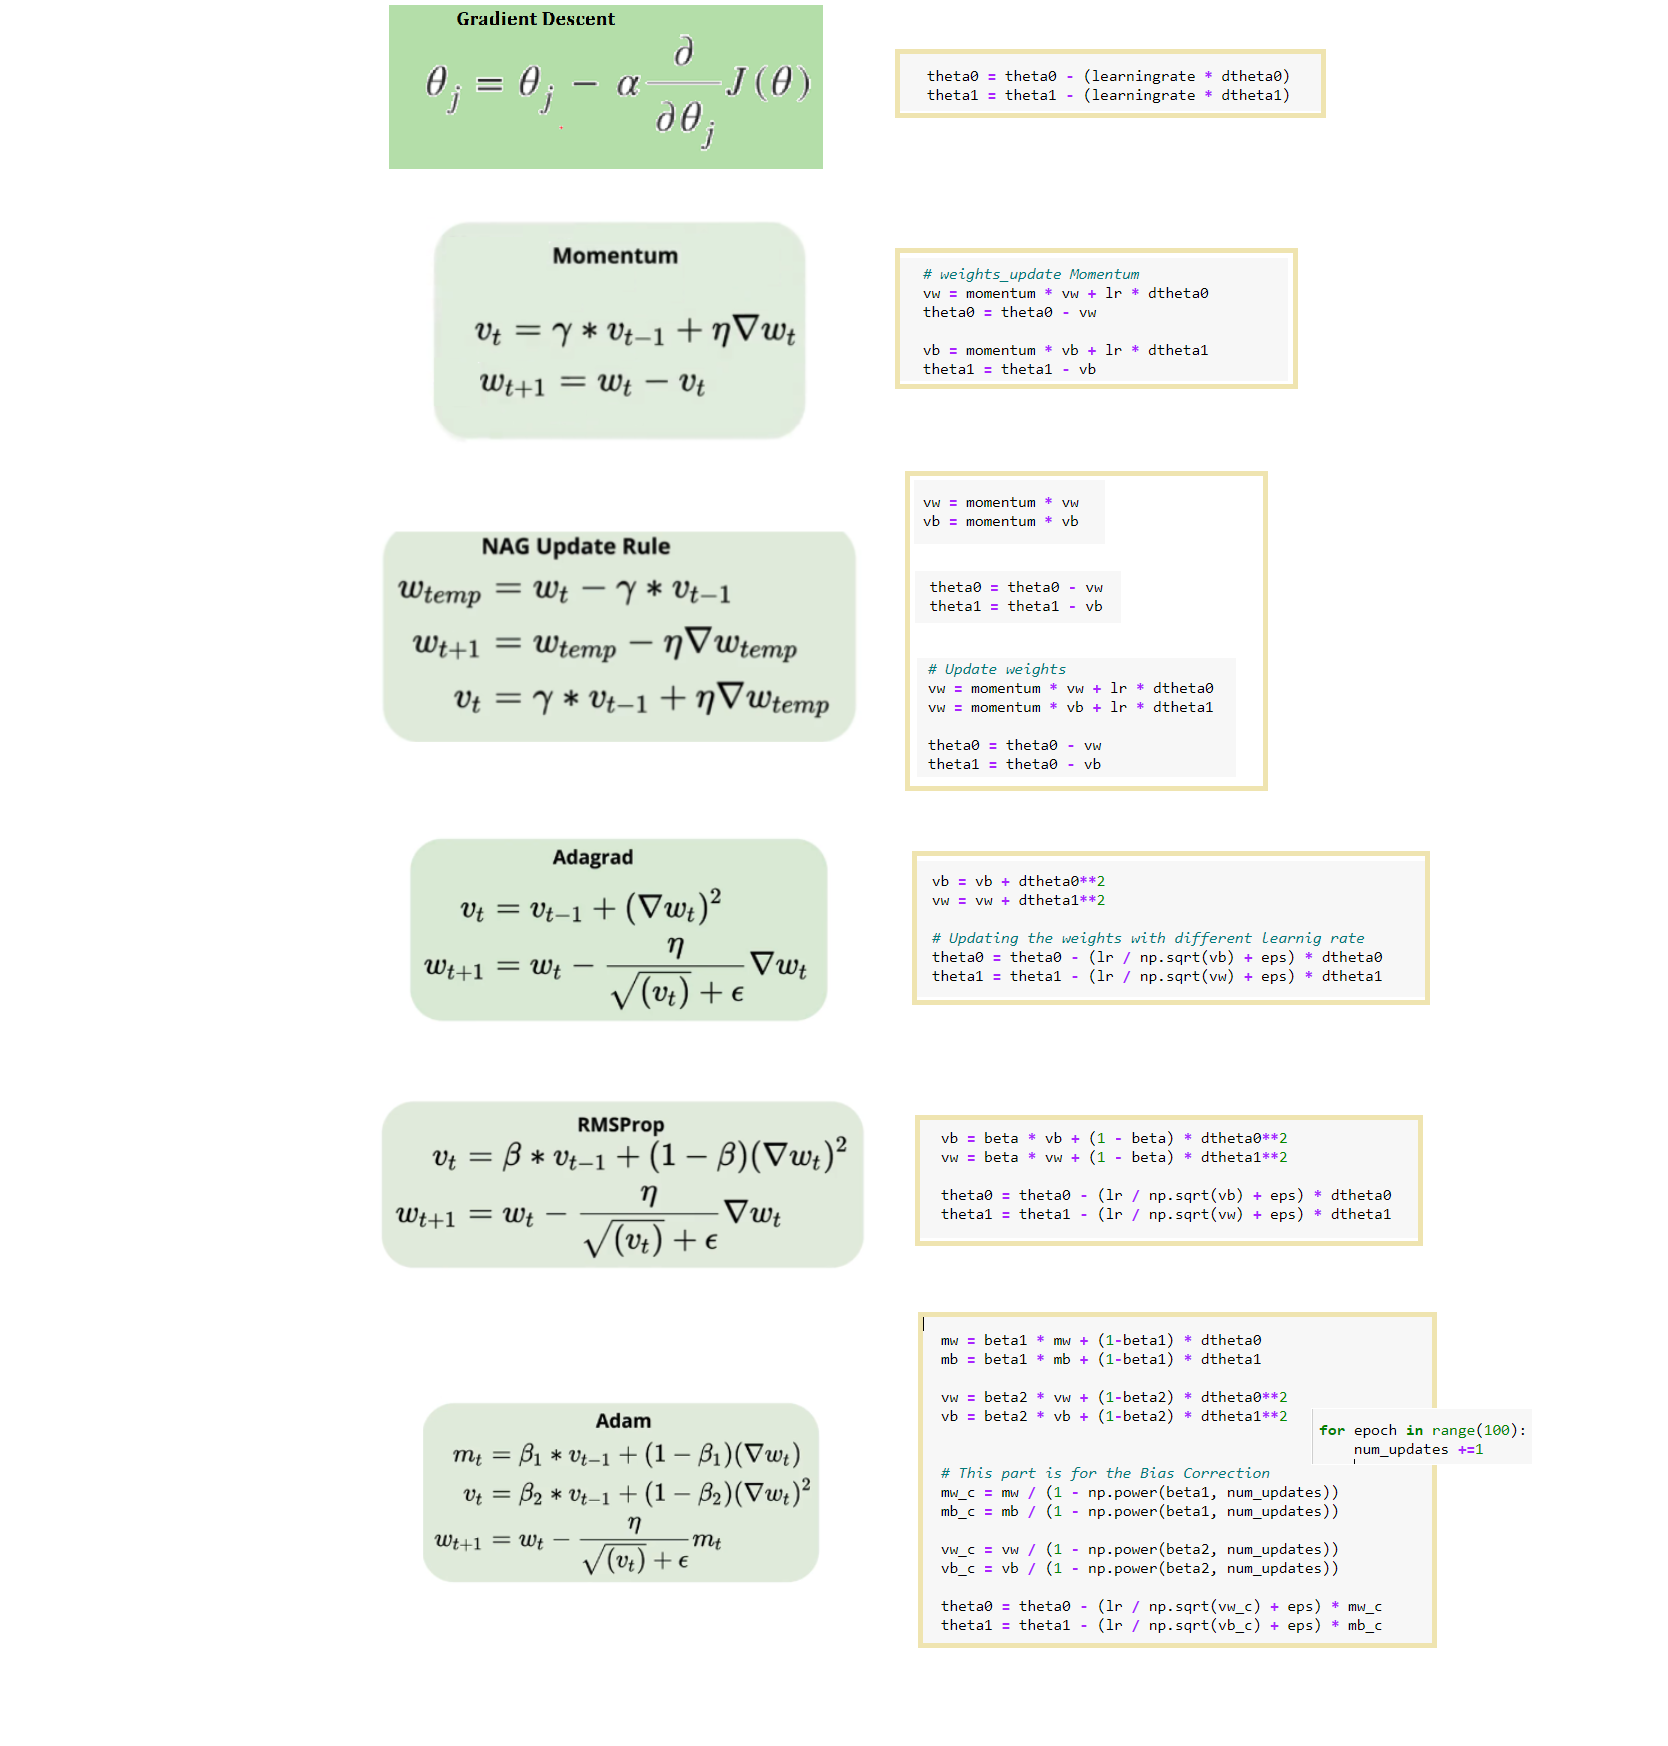

In [ ]:
# GD
    theta0 = theta0 - lr * dtheta0
    theta1 = theta1 - lr * dtheta1

# Momentum
    '''
    below the code 'vw' and 'vb' are velocity variables to store oue momentum for every parameters.
    The update of the velocity is given the old velocity value and new gradient Descent step.
    also we decay our past velocity so that we only consider the most recent velocities with gamma =.9
    '''    
    vw = gamma * vw + lr * dtheta0
    vb = gamma * vb + lr * dtheta1

    theta0 = theta0 - vw
    theta1 = theta1 - vb

# NAG
    '''
    Nesterov Momentum add one little different bit to the momentum calculation.
    Instead of calculating gradient of the current position, it calculates the gradient at the approximated new position.
    It uses the next approximated position’s gradient with the hope that it will give us better 
    information when we’re taking the next step
    
    Here we are computing the gradient using model head approximated next state of our model parameters \
    that we calculated by adding the momentum to the current parameters.
    
    We know we’ll be using γV(t−1) for modifying the weights so, θ−γV(t−1)[theta0 = theta0 - vw] approximately 
    tells us the future locationNow, we’ll calculate the cost based on this future parameter rather than the current one.
    
    '''
    vw = gamma * vw
    vb = gamma * vb 

    theta0 = theta0 - vw
    theta1 = theta1 - vb

    vw = vw + eta * dtheta0
    vb = vb + eta * dtheta1

    theta0 = theta0 - vw
    theta1 = theta1 - vb

# AdaGrad
    
        '''
        The problem with learning rate in Gradient Descent is that it’s constant and affecting all of our parameters
        
         What happen if we know that we should slow down or speed up?
         
         What happen if we know that we should accelerate more in this direction and decelerate in that direction?
         
         What we do is to accumulate the sum of squared of all of our parameters’ gradient, and use that to 
         normalize the learning rate alpha,
         
         so that now our alpha could be smaller or larger depending on how the past gradients behaved.
         
         parameters that updated a lot will be slowed down while parameters that received little updates will be have 
         bigger learning rate to accelerate the learning process.
        
        '''

    vw = vw + dtheta0**2
    vb = vb + dtheta1**2

    theta0 = theta0 - (lr / np.sqrt(vw) + eps ) * dtheta0
    theta1 = theta1 - (lr / np.sqrt(vb) + eps ) * dtheta1

# RMSProp :RMSprop deals with the above issue by using a moving average of squared gradients to normalize the gradient.

    '''
    If you notice, at the gradient accumulation part in Adagrad cache[k] += grad[k]**2.
    
    it’s monotonically increasing (hint: sum and squared).this could be problematic as the learning rate will be monotonically 
    decreasing to the point that the learning stops altogether because of the very tiny learning rate.
    
    To combat that problem, RMSprop decay the past accumulated gradient, so only a portion of past gradients are considered. 
    Now, instead of considering all of the past gradients, RMSprop behaves like moving average.
    
    Here, we’re take gamma portion of past accumulated sum of squared gradient, 
    and take 1 - gamma portion of the current squared gradient. 
    
    By doing this, the accumulated gradient won’t be aggresively monotonically increasing,
    '''


    vw = beta * vw + (1 - beta) * dtheta0**2
    vb = beta * vb + (1 - beta) * dtheta1**2

    theta0 = theta0 - (eta / np.sqrt(vw) + eps) * dtheta0
    theta1 = theta1 - (eta / np.sqrt(vb) + eps) * dtheta1


# Adam

    '''
    Adam tries to combine the best of both world of momentum and adaptive learning rate.
    
    we still retain some RMSprop’s codes, namely when we calculate R.
    We also add some codes that are similar to how we compute momentum in the form of M
    Then, for the parameters update, it’s the combination of momentum method and adaptive learning rate method:
    add the momentum, and normalize the learning rate using the moving average squared gradient.
    
    Adam also has a bias correction mechanism, it’s calculated in m_k_hat and r_k_hat. 
    It’s useful to make the convergence faster, at several first iterations.
    The reason is that we initialized M and R with zero, hence it will be biased toward zero in several first iterations.
    
    The solution is to correct the bias and get the unbiased estimate of M and R
    
    Adam also keeps an exponentially decaying average of past gradients M(t).
    M(t) and V(t) are values of the first moment which is the Mean and the second 
    moment which is the uncentered variance of the gradients respectively.
    
    '''
    mw = beta1 * mw + (1-beta1) * dtheta0
    mb = beta1 * mb + (1-beta1) * dtheta1

    vw = beta2 * vw + (1-beta2) * dtheta0**2
    vb = beta2 * vb + (1-beta2) * dtheta1**2

    mw_c = mw / (1 - np.power(beta1, num_updates))
    mb_c = mb / (1 - np.power(beta1, num_updates))

    vw_c = vw / (1 - np.power(beta2, num_updates))
    vb_c = vb / (1 - np.power(beta2, num_updates))

    theta0 = theta0 - (eta / np.sqrt(vw_c) + eps) * mw_c
    theta1 = theta1 - (eta / np.sqrt(vb_c) + eps) * mb_c

In [ ]:
'''
# 01 

Stochastic Gradient Descent (SGD) updates
    param := param - learning_rate * gradient

#02

Stochastic Gradient Descent (SGD) updates with momentum
    velocity := momentum * velocity - learning_rate * gradient
    param := param + velocity
    
#03 

Stochastic Gradient Descent (SGD) updates with Nesterov momentum
    velocity := momentum * velocity - learning_rate * gradient
    param := param + momentum * elocity - learning_rate * gradient
    
#04 

Adagrad updates:
    Scale learning rates by dividing with the square root of accumulated squared gradients.

#05

RMSProp:
    Scale learning rates by dividing with the moving average of the root mean squared (RMS) gradients

#06
Adadelta updates:
    Scale learning rates by the ratio of accumulated gradients to accumulated updates.
   
#07
Adamax:
    This is a variant of of the Adam algorithm based on the infinity norm.
'''